# Description of the Auto dataset

The Auto dataset is a collection of data describing various automobiles, primarily aimed at exploring relationships between vehicle characteristics and fuel efficiency. Here's a detailed breakdown:

## Dataset Features:

1 **mpg:** Miles per gallon, representing fuel efficiency (target variable).

2. **cylinders:** Number of engine cylinders (e.g., 4, 6, 8).

3. **displacement:** Engine displacement in cubic inches, indicating engine size.

4. **horsepower:** Horsepower, measuring engine power (has some missing values).

5. **weight:** Weight of the vehicle (in lbs).

6. **acceleration:** Time to accelerate from 0 to 60 mph (in seconds).

7. **year:** Model year (e.g., 70 for 1970, 82 for 1982).

8. **origin:** Categorical feature representing the origin of the car:

    1: American
    2: European
    3: Asian

9. **name:** Name of the car (not used for regression analysis).


# Objective: 

We want to use linear regression to predict the value of **mpg (mile per gallon)** of new unseen records (a new given car) based on the number of cylinders, displacement (a measure for the capacity of the engine), horsepower and so on.

**Independent Variable:** Cylinders, displacement, horsepower, weight, acceleration, year, origin

**Dependent Varibale:** mpg

N.B. You can download the Auto dataset from Studium.


# Steps

**Data Preprocessing:**

1. Handled missing values in horsepower by imputing the mean.

2. Standardized numerical features for uniform scaling.

3. Removed the name column, as it is non-numerical and not useful for regression.


**Feature Engineering:**

1. Normalized all numerical features (e.g., displacement, weight) to ensure compatibility in regression.

**Modeling:**

We built two Linear Regression models:

(a) Using Linear Algebra (Normal Equation): Computes optimal weights by directly solving a closed-form equation.

(b) Using Gradient Descent: Iteratively optimizes weights by minimizing the least squares loss.
Evaluation:

**Loss:**  We used the Mean Squared Error (MSE) metric to evaluate model performance on the test dataset.


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [18]:
# Load dataset
file_path = 'Auto.csv'  # Adjust this path if needed
data = pd.read_csv(file_path)


In [19]:
# Data Preprocessing
# Drop the 'name' column (not useful for regression)
data_cleaned = data.drop(columns=['name'])

# Handle missing values in 'horsepower' (mean imputation)
data_cleaned['horsepower'] = data_cleaned['horsepower'].fillna(data_cleaned['horsepower'].mean())

# Features (X) and target (y)
X = data_cleaned.drop(columns=['mpg'])
y = data_cleaned['mpg']

In [20]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to numpy arrays for computation
X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test)
y_test = np.array(y_test).reshape(-1, 1)


In [22]:
# Linear Regression using Normal Equation
def linear_regression_normal_eq(X, y):
    X_bias = np.hstack([np.ones((X.shape[0], 1)), X])  # Add bias term
    weights = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y  # Normal Equation
    return weights

In [23]:

# Predictions using Normal Equation
def predict_lr(X, weights):
    X_bias = np.hstack([np.ones((X.shape[0], 1)), X])  # Add bias term
    return X_bias @ weights

In [24]:
# Linear Regression using Gradient Descent
def linear_regression_gradient_descent(X, y, learning_rate=0.05, epochs=1000):
    X_bias = np.hstack([np.ones((X.shape[0], 1)), X])  # Add bias term
    weights = np.zeros((X_bias.shape[1], 1))  # Initialize weights
    m = len(y)
    for _ in range(epochs):
        gradients = (2/m) * X_bias.T @ (X_bias @ weights - y)
        weights -= learning_rate * gradients
    return weights

In [25]:
# Train models
weights_normal_eq = linear_regression_normal_eq(X_train, y_train)
weights_gradient_descent = linear_regression_gradient_descent(X_train, y_train, learning_rate=0.05, epochs=1000)


In [26]:
# Predictions
y_pred_normal_eq = predict_lr(X_test, weights_normal_eq)
y_pred_gradient = predict_lr(X_test, weights_gradient_descent)


In [27]:
# Evaluate models using Mean Squared Error (MSE)
mse_normal_eq = mean_squared_error(y_test, y_pred_normal_eq)
mse_gradient = mean_squared_error(y_test, y_pred_gradient)


# Print Results
print("Weights (Normal Equation):", weights_normal_eq.flatten())
print("MSE (Normal Equation):", mse_normal_eq)

print("\nWeights (Gradient Descent):", weights_gradient_descent.flatten())
print("MSE (Gradient Descent):", mse_gradient)

Weights (Normal Equation): [23.33550736 -0.88468207  1.81831124 -0.40564462 -5.74468015  0.15793148
  2.82085488  0.77428421]
MSE (Normal Equation): 13.113708668241454

Weights (Gradient Descent): [23.3352433  -0.83434825  1.72528761 -0.39343368 -5.71855452  0.15476599
  2.81949098  0.76750183]
MSE (Gradient Descent): 13.116644797029897


Epoch wise loss

[Epoch 1/100] Train loss: 302.5976 Test loss: 324.6554
[Epoch 2/100] Train loss: 295.3778 Test loss: 316.7595
[Epoch 3/100] Train loss: 288.4168 Test loss: 309.1631
[Epoch 4/100] Train loss: 281.6992 Test loss: 301.8480
[Epoch 5/100] Train loss: 275.2110 Test loss: 294.7976
[Epoch 6/100] Train loss: 268.9391 Test loss: 287.9967
[Epoch 7/100] Train loss: 262.8716 Test loss: 281.4311
[Epoch 8/100] Train loss: 256.9974 Test loss: 275.0876
[Epoch 9/100] Train loss: 251.3061 Test loss: 268.9541
[Epoch 10/100] Train loss: 245.7885 Test loss: 263.0195
[Epoch 11/100] Train loss: 240.4356 Test loss: 257.2731
[Epoch 12/100] Train loss: 235.2393 Test loss: 251.7055
[Epoch 13/100] Train loss: 230.1922 Test loss: 246.3077
[Epoch 14/100] Train loss: 225.2873 Test loss: 241.0712
[Epoch 15/100] Train loss: 220.5180 Test loss: 235.9885
[Epoch 16/100] Train loss: 215.8783 Test loss: 231.0522
[Epoch 17/100] Train loss: 211.3625 Test loss: 226.2556
[Epoch 18/100] Train loss: 206.9656 Test loss: 221.5926
[

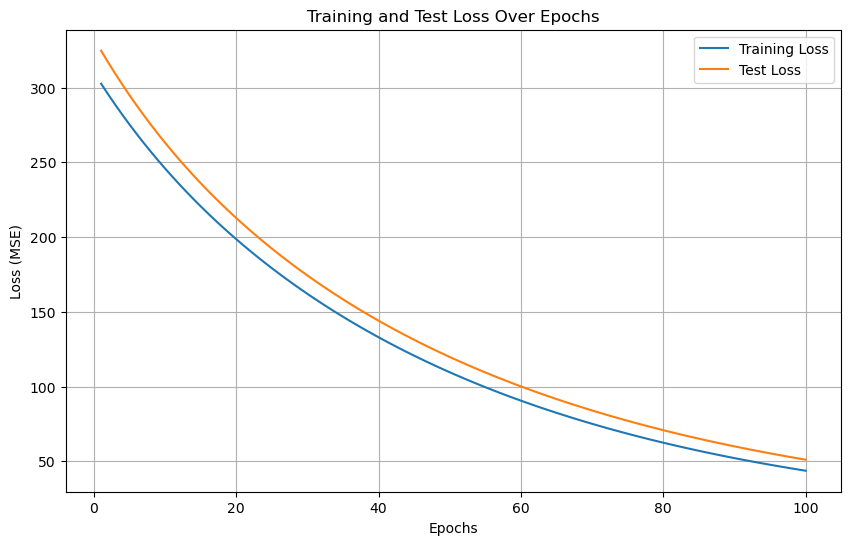

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = 'Auto.csv'  # Adjust this path if needed
data = pd.read_csv(file_path)

# Data Preprocessing
# Drop the 'name' column (not useful for regression)
data_cleaned = data.drop(columns=['name'])

# Handle missing values in 'horsepower' (mean imputation)
data_cleaned['horsepower'] = data_cleaned['horsepower'].fillna(data_cleaned['horsepower'].mean())

# Features (X) and target (y)
X = data_cleaned.drop(columns=['mpg'])
y = data_cleaned['mpg']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to numpy arrays for computation
X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test)
y_test = np.array(y_test).reshape(-1, 1)

# Linear Regression using Gradient Descent with Loss Tracking
def linear_regression_gradient_descent_with_loss(X, y, X_test, y_test, learning_rate=0.01, epochs=100):
    X_bias = np.hstack([np.ones((X.shape[0], 1)), X])  # Add bias term
    weights = np.zeros((X_bias.shape[1], 1))  # Initialize weights
    m = len(y)
    train_losses = []  # To store training loss at each epoch
    test_losses = []  # To store test loss at each epoch
    
    for epoch in range(epochs):
        # Compute predictions for training set
        predictions_train = X_bias @ weights
        train_loss = (1 / (2 * m)) * np.sum((predictions_train - y) ** 2)  # Training loss
        train_losses.append(train_loss)
        
        # Compute predictions for test set
        predictions_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test]) @ weights
        test_loss = (1 / (2 * len(y_test))) * np.sum((predictions_test - y_test) ** 2)  # Test loss
        test_losses.append(test_loss)
        
        # Print epoch-wise losses
        print(f"[Epoch {epoch + 1}/{epochs}] Train loss: {train_loss:.4f} Test loss: {test_loss:.4f}")
        
        # Compute gradients and update weights
        gradients = (1 / m) * X_bias.T @ (predictions_train - y)
        weights -= learning_rate * gradients
    
    return weights, train_losses, test_losses

# Train the model
weights_gradient_descent, train_losses, test_losses = linear_regression_gradient_descent_with_loss(
    X_train, y_train, X_test, y_test, learning_rate=0.01, epochs=100
)

# Plot Training and Test Loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(test_losses) + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


# Explanation: Updating Weights and Bias in Gradient Descent

The bias term \( w_0 \) is explicitly added to the feature matrix as a column of ones:

$$
X_{\text{bias}} =
\begin{bmatrix}
1 & x_{11} & x_{12} \\
1 & x_{21} & x_{22} \\
1 & x_{31} & x_{32}
\end{bmatrix}
$$

## Gradient Calculation
The gradient for **all weights** (including the bias) is computed as:

$$
\nabla_w = \frac{1}{m} X_{\text{bias}}^\top \left( X_{\text{bias}} w - y \right)
$$

## Weights Update Rule
The weights (including the bias) are updated using the rule:

$$
w := w - \alpha \cdot \nabla_w
$$

Where:
\( X_{\text{bias}} \): Feature matrix with the bias term.

\( w \): Weight vector, including \( w_0 \) (bias) and other weights (\( w_1, w_2, \dots, w_n \)).

\( y \): Target values.

\( m \): Number of training samples.

\( \alpha \): Learning rate.
